# Explanatory Data Analysis - Visualization
(by Tevfik Aytekin)

In [1]:
#import utils
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic
import tkinter
from matplotlib.backends.backend_tkagg import (
    FigureCanvasTkAgg, NavigationToolbar2Tk)
# Implement the default Matplotlib key bindings.
from matplotlib.backend_bases import key_press_handler
from matplotlib.figure import Figure
from sklearn.neighbors import KernelDensity
from sklearn import datasets
from sklearn.decomposition import PCA
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)
plt.rcParams['figure.figsize'] = [4.5, 3.5]
#plt.rcParams['figure.dpi'] = 100



%matplotlib inline
pd.options.display.max_rows = 2000
pd.options.display.max_columns = 100

import warnings
warnings.filterwarnings('ignore')

In [2]:
# https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques
house = pd.read_csv("../../datasets/house_prices/train.csv")
#house = pd.read_csv("train.csv")
# print first 10 houses
house.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,BrkTil,TA,TA,No,GLQ,851,Unf,0,140,991,GasA,Ex,

In [3]:
# show descriptive statistics of specific columns
house.describe(include='all')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460.000000,1460,1201.000000,1460.000000,1460,91,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460.000000,1460.000000,1460.000000,1460.000000,1460,1460,1460,1460,588,1452.000000,1460,1460,1460,1423,1423,1422,1423,1460.000000,1422,1460.000000,1460.000000,1460.000000,1460,1460,1460,1459,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460,1460.000000,1460,1460.000000,770,1379,1379.000000,1379,1460.000000,1460.000000,1379,1379,1460,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,7,281,54,1460.000000,1460.000000,1460.000000,1460,1460,1460.000000
unique,NaN,NaN,5,NaN,NaN,2,2,4,4,2,5,3,25,9,8,5,8,NaN,NaN,NaN,NaN,6,8,15,16,3,NaN,4,5,6,4,4,4,6,NaN,6,NaN,NaN,NaN,6,5,2,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,7,NaN,5,6,NaN,3,NaN,NaN,5,5,3,NaN,NaN,NaN,NaN,NaN,NaN,3,4,4,NaN,NaN,NaN,9,6,NaN
top,NaN,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,NaN,NaN,NaN,NaN,Gable,CompShg,VinylSd,VinylSd,BrkFace,NaN,TA,TA,PConc,TA,TA,No,Unf,NaN,Unf,NaN,NaN,NaN,GasA,Ex,Y,SBrkr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TA,NaN,Typ,NaN,Gd,Attchd,NaN,Unf,NaN,NaN,TA,TA,Y,NaN,NaN,NaN,NaN,NaN,NaN,Gd,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,NaN,1151,NaN,NaN,1454,50,925,1311,1459,1052,1382,225,1260,1445,1220,726,NaN,NaN,NaN,NaN,1141,1434,515,504,445,NaN,906,1282,647,649,1311,953,430,NaN,1256,NaN,NaN,NaN,1428,741,1365,1334,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,735,NaN,1360,NaN,380,870,NaN,605,NaN,NaN,1311,1326,1340,NaN,NaN,NaN,NaN,NaN,NaN,3,157,49,NaN,NaN,NaN,1267,1198,NaN
mean,730.500000,56.897260,NaN,70.049958,10516.828082,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.099315,5.575342,1971.267808,1984.865753,NaN,NaN,NaN,NaN,NaN,103.685262,NaN,NaN,NaN,NaN,NaN,NaN,NaN,443.639726,NaN,46.549315,567.240411,1057.429452,NaN,NaN,NaN,NaN,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,NaN,6.517808,NaN,0.613014,NaN,NaN,1978.506164,NaN,1.767123,472.980137,NaN,NaN,NaN,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,NaN,NaN,NaN,43.489041,6.321918,2007.815753,NaN,NaN,180921.195890
std,421.610009,42.300571,NaN,24.284752,9981.264932,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.382997,1.112799,30.202904,20.645407,NaN,NaN,NaN,NaN,NaN,181.066207,NaN,NaN,NaN,NaN,NaN,NaN,NaN,456.098091,NaN,161.319273,441.866955,438.705324,NaN,NaN,NaN,NaN,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,NaN,1.625393,NaN,0.644666,NaN,NaN,24.689725,NaN,0.747315,213.804841,NaN,NaN,NaN,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,NaN,NaN,NaN,496.123024,2.703626,1.328095,NaN,NaN,79442.502883
min,1.000000,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1872.000000,1950.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,2.000000,NaN,0.000000,NaN,NaN,1900.000000,N

In [4]:
house.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType        872
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

### Bank Marketing Dataset

In [5]:
# https://archive.ics.uci.edu/ml/datasets/Bank+Marketing

bank = pd.read_csv("../../datasets/bank_marketing/bank-full.csv", delimiter = ";")
# bank = pd.read_csv("bank-full.csv", delimiter = ";")
# print first 10 examples
bank.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [6]:
bank.shape

(45211, 17)

In [7]:
#https://en.wikipedia.org/wiki/Iris_flower_data_set
#https://www.britannica.com/science/sepal
iris = datasets.load_iris()
iris = pd.DataFrame(data = np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [8]:
iris.shape

(150, 5)

In [9]:
#https://allisonhorst.github.io/palmerpenguins/
penguins = sns.load_dataset("penguins")
penguins.head(5)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [10]:
penguins.shape

(344, 7)

### Univariate Plots for Numeric Data
### Strip Plot

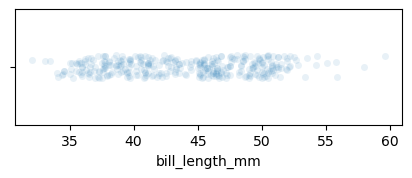

In [11]:
plt.figure(figsize=(5,1.5))
sns.stripplot(data=penguins.bill_length_mm, orient="h", alpha=0.1, jitter=0.1);


**Question**: What are the roles of the alpha and jitter parameters? You can play with their values and see yourself. With a good combination of jittering and alpha blending you can visualize the distribution of thousands of data points.

If the number of data points is large then, due to overlapping, the visualization will not be informative.

For example, the plot belows shows the age distribution of the individuals in the bank dataset.

Number of individuals: 45211


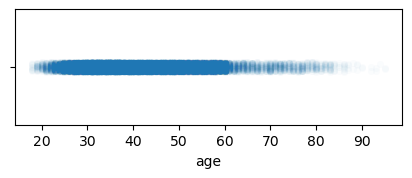

In [12]:
plt.figure(figsize=(5,1.5))
sns.stripplot(data=bank.age, orient="h", alpha=0.02, jitter=0.04);
print("Number of individuals:", len(bank.age))

You might try to decrase alpha and increase jitter, but since the data set is large, it might not help. There are other types of plots for large datasets as we will see.

Number of individuals: 45211


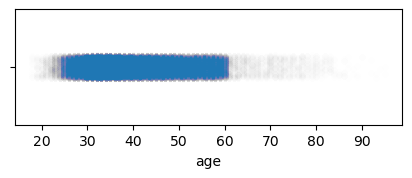

In [13]:
plt.figure(figsize=(5,1.5))
sns.stripplot(data=bank.age, orient="h", alpha=0.002, jitter=0.1);
print("Number of individuals:", len(bank.age))

### Pros and Cons of Strip Plots
- Easy to understand.
- The entire data can be seen. 
- Gaps and outliers can be easily seen.

Cons:
- Especially for large datasets, points will overlap, making it difficult to dscern the density of data points.
- Lack of summary statistics such as median, quartiles, etc.


### Swarm Plots (aka beeswarm plots)

Similar to Strip plot but prevents overlapping. This can we useful when you want to make sure that all data points are seen. Even if you use jittering the might be overlap due to chance and it might be difficult to notice the overlapping. Following is a hypothetical data showing the grades of students from an exam.

In [14]:
grades = np.array([25, 14, 73, 24, 71, 51, 81, 16, 70, 82, 36, 63, 95, 26, 77, 49, 60,
       80, 85,  2, 27, 48, 89, 85, 91, 65, 29, 38, 17, 80, 48, 36, 53, 14,
       74, 52, 53, 64, 38, 52, 87, 87, 52, 77, 13, 27, 60, 59, 41, 95,  9])

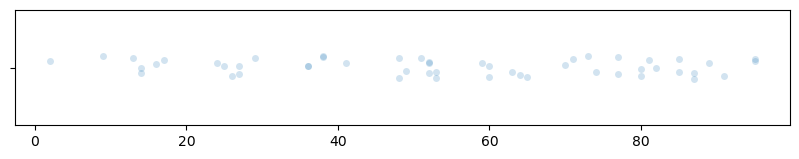

In [15]:
plt.figure(figsize=(10,1.5))
np.random.seed(1)
sns.stripplot(data=grades, orient="h", alpha=0.2, jitter=0.1);


In the following plot grades are more clearly seen. Stdeunts with have a specific grade can be counted.


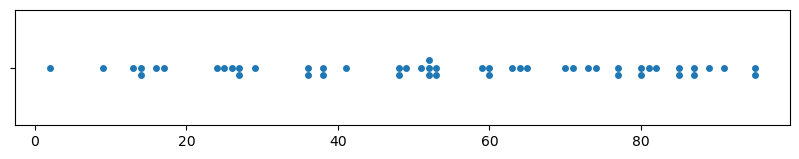

In [16]:
plt.figure(figsize=(10,1.5))

sns.swarmplot(data=grades, orient="h" );


Penguins bill length

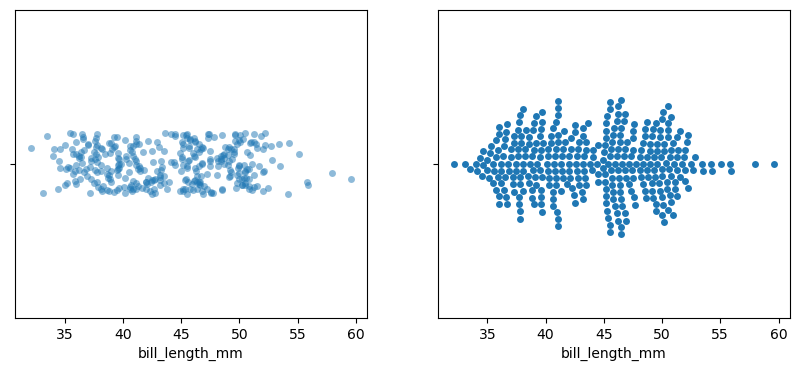

In [17]:
f, axarr = plt.subplots(1,2)
f.set_size_inches(10,4)
data = np.random.normal(size=100)
sns.stripplot(data=penguins.bill_length_mm, orient="h", alpha=0.5, jitter=0.1, ax=axarr[0] );
sns.swarmplot(data=penguins.bill_length_mm, orient="h", ax=axarr[1] );

From the following swarm plot, it is not possible to see the number of individuals with ages 46 or 47.

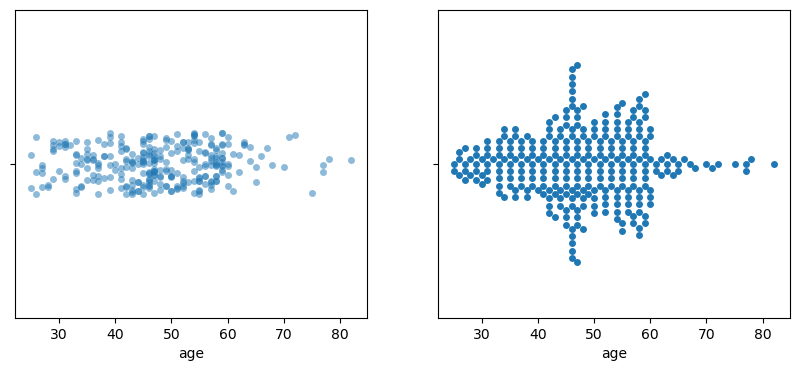

In [18]:
f, axarr = plt.subplots(1,2)
f.set_size_inches(10,4)
data = np.random.normal(size=100)
sns.stripplot(data=bank[bank.job=="unknown"].age, orient="h", alpha=0.5, jitter=0.1, ax=axarr[0] );
sns.swarmplot(data=bank[bank.job=="unknown"].age, orient="h", ax=axarr[1] );

This one is better. We can easily see that there are a few people older than 70.

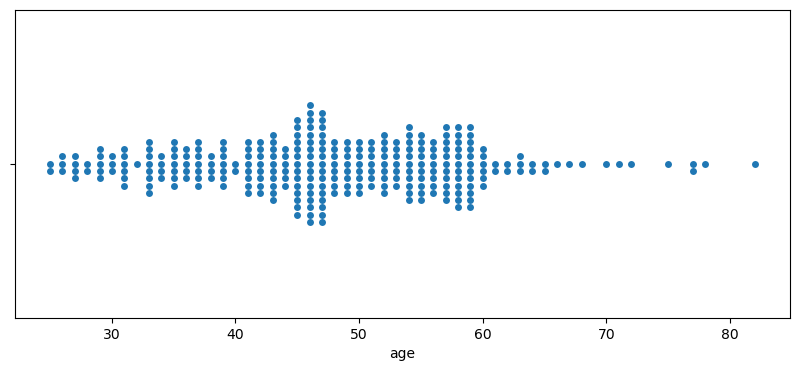

In [19]:
plt.figure(figsize=(10,4))
sns.swarmplot(data=bank[bank.job=="unknown"].age, orient="h", );

IRIS Dataset

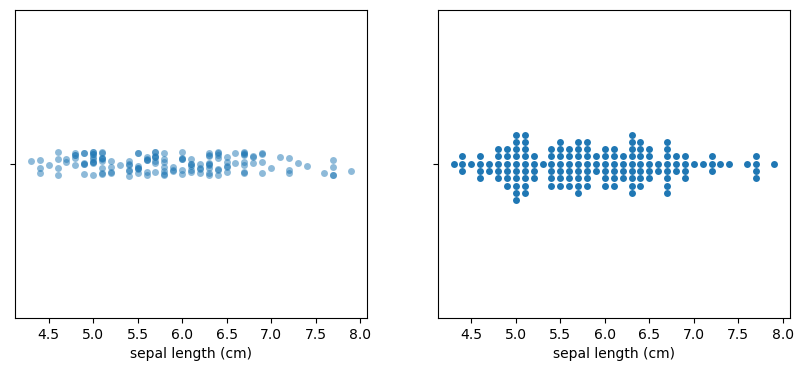

In [20]:

f, axarr = plt.subplots(1,2)
f.set_size_inches(10,4)
sns.stripplot(data=iris["sepal length (cm)"], orient="h", alpha=0.5, jitter=0.04, ax=axarr[0] );
sns.swarmplot(data=iris["sepal length (cm)"], orient="h", ax=axarr[1] );


### Pros and Cons of Swarm Plots
Pros
- Easy to understand
- The entire data can be seen better than strip plots since there are no overlaps

Cons
- Only can be used with very small datasets
- The layout algorithm might lead to false impressions of data density.

### Histogram

Histograms are one of the most popular visualizations for understanding the distribution of data. It splits the data into equal sized bins and shows the count of values that falls into each bin with bars. However, the result is dependent on the number of bins. For example, the following plots visualize the same data. if you look at the right top figure below, the distribution of the data is not correctly reflected. **One solution to this problem is to plot histograms with different number of bins for the same data.**

Text(0.5, 1.0, 'bins=100')

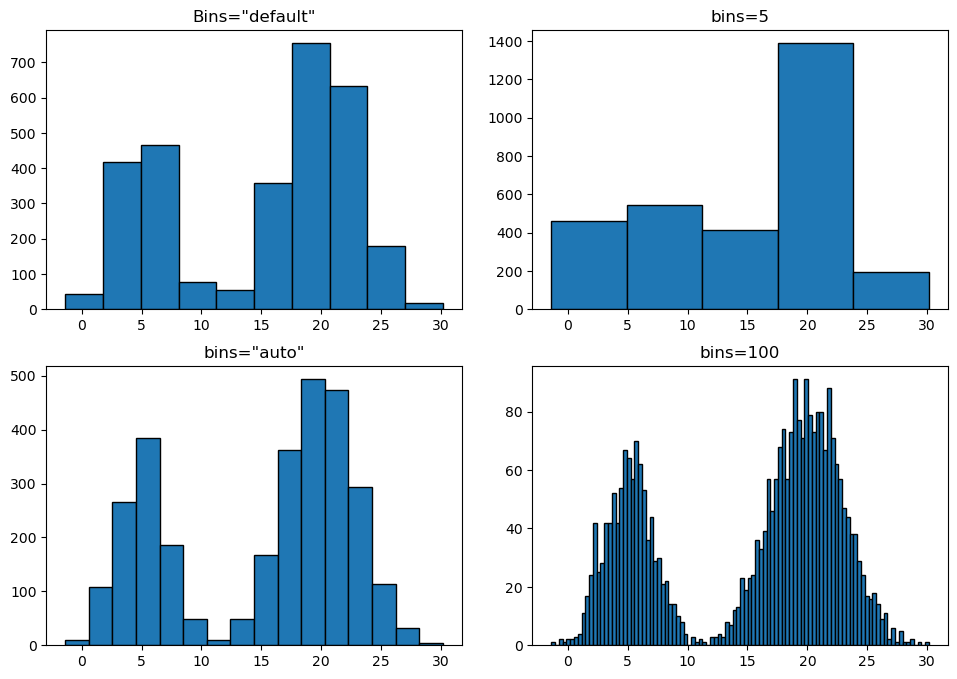

In [21]:
data = list(np.random.normal(5, 2, 1000)) + list(np.random.normal(20, 3, 2000))

fig, axs = plt.subplots(2, 2)
fig.set_size_inches(10, 7)
fig.tight_layout(pad=2.0)
axs[0, 0].hist(data, edgecolor='black')
axs[0, 0].set_title('Bins="default"')
axs[0, 1].hist(data, edgecolor='black', bins = 5)
axs[0, 1].set_title('bins=5')
axs[1, 0].hist(data, edgecolor='black', bins="auto")
axs[1, 0].set_title('bins="auto"')
axs[1, 1].hist(data, edgecolor='black', bins=100)
axs[1, 1].set_title('bins=100')

Another example showing the the same dataset with different bin sizes. Even though the dataset is the same, looking at the histograms might give the impression that you are looking at two different datasets.

A general rule of thumb with histograms is to try different bandwiths in order not to avoid misleading impressions of the underlying distribution.

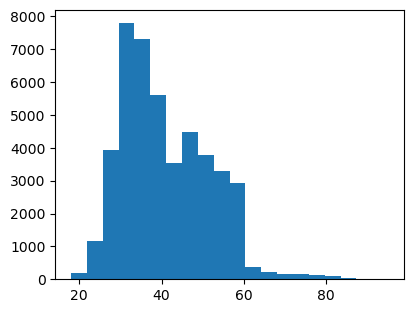

In [22]:
plt.hist(bank.age, bins=20);

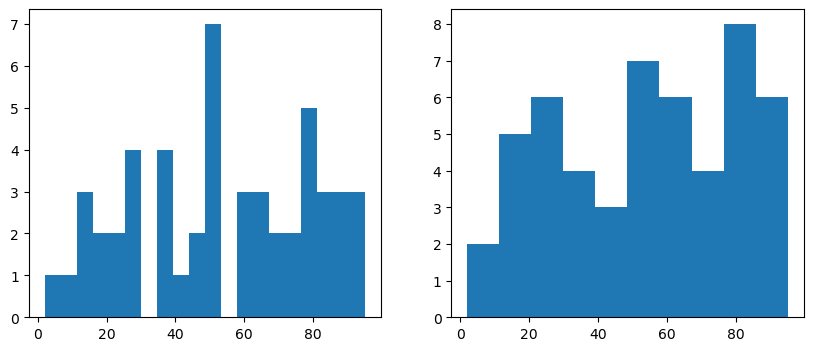

In [23]:
f, axarr = plt.subplots(1,2)
f.set_size_inches(10,4)
axarr[0].hist(grades, bins=20);
axarr[1].hist(grades, bins=10);

#### Selecting the number of bins?

There are different methods for selecting the number of bins. The default value in matplotlib is 10, if bin="auto" it uses the maximum of the ‘sturges’ and ‘fd’ estimators. For other estimators see: [histogram_bin_edges](https://numpy.org/doc/stable/reference/generated/numpy.histogram_bin_edges.html#numpy.histogram_bin_edges)

**‘fd’ (Freedman Diaconis Estimator)**

$$
bin\_width = 2\frac{IQR}{n^{1/3}}
$$

where $IQR$ is interquartile range, $n$ is the the number of elements. Can be too conservative for small datasets, but is quite good for large datasets. The IQR is very robust to outliers.

**‘sturges’**

$$
number\_of\_bins = \log_2(n)+1
$$

This estimator assumes normality of data and is too conservative for larger, non-normal datasets. 

### Box and Whiskers Plot
Boxplots show the distribution of the values using quartiles. If we sort a set of numbers then the second quartile Q2 (also called the median) is the number which is in the middle position, Q1 is the the middle number between the smallest and the median, Q2 is the middle number netween the median and the largest number.

In a box plot, 
- the line inside the box corresponds to the median of the data 
- the ends of the boxes correspond to quartile Q1 (25% percentile) and Q3 (75th percentile).
- whiskers extend to the points that are not outliers
- outliers (generally) defined to be those data points which below $Q1 - 1.5*IQR$ or above $Q3 + 1.5*IQR$ where IQR is the interquartile range (that is the size of the box)
- the kth percentile represents the point at which k percent of the data is below that value.



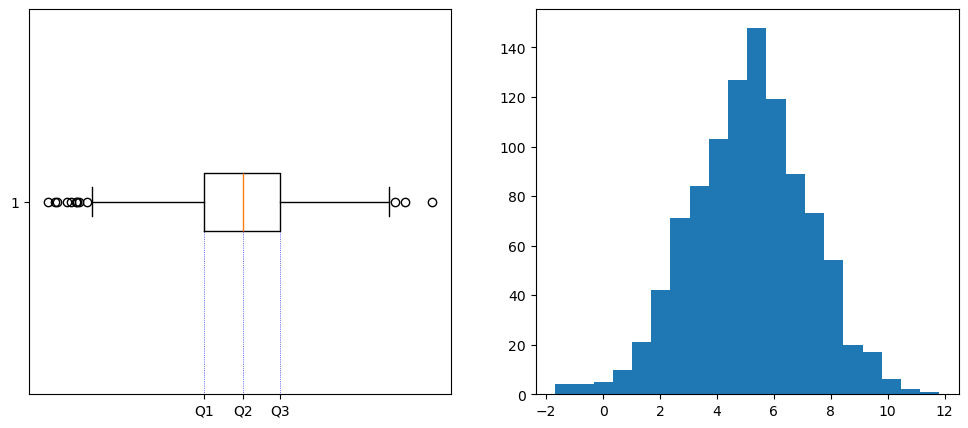

In [24]:


# Generate normally distributed data
data = np.random.normal(5, 2, 1000)
f, axarr = plt.subplots(1,2)
f.set_size_inches(12,5)

quantiles = np.quantile(data, np.array([0.25, 0.50, 0.75]))
axarr[0].vlines(quantiles, [0] * quantiles.size, [1] * quantiles.size,
          color='b', ls=':', lw=0.5, zorder=0)
axarr[0].set_xticks(quantiles, labels=["Q1","Q2","Q3"])
axarr[0].set_ylim(0.5, 1.5)

axarr[0].boxplot(data, vert=False)
axarr[1].hist(data, 20);

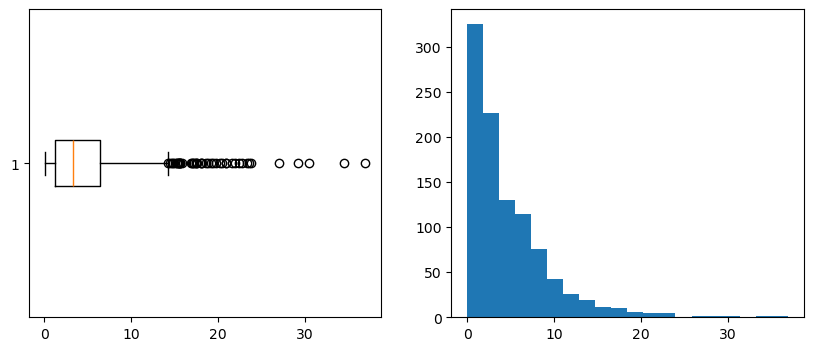

In [25]:
# Generate exponentially distributed data
data = np.random.exponential(5,1000)
f, axarr = plt.subplots(1,2)
f.set_size_inches(10,4)
axarr[0].boxplot(data, vert=False)
axarr[1].hist(data, 20);

### Histogram vs. Boxplot

- In general histograms give more information about the data distribution compared to a boxplot. As you can see in the plots below, from the boxplot it is not possible to see that we have a bimodal distribution (a distribution with two peaks).

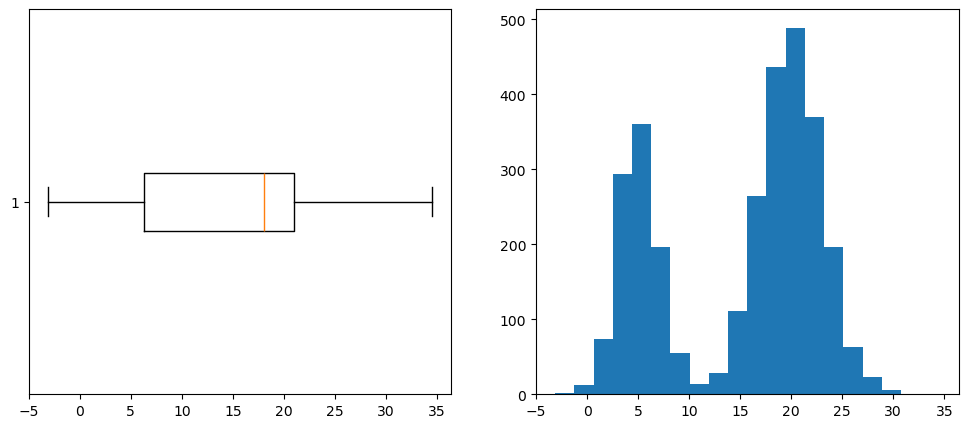

In [74]:
data = list(np.random.normal(5, 2, 1000)) + list(np.random.normal(20, 3, 2000))
f, axarr = plt.subplots(1,2)
f.set_size_inches(12,5)
axarr[0].boxplot(data, vert=False)
axarr[1].hist(data, 20);import warnings
warnings.filterwarnings('ignore')

- Hovever, with a boxplot you can easily find out the quartiles of the data. For example, in the boxplot below, it is easy to find that the median of the data is around 3, 

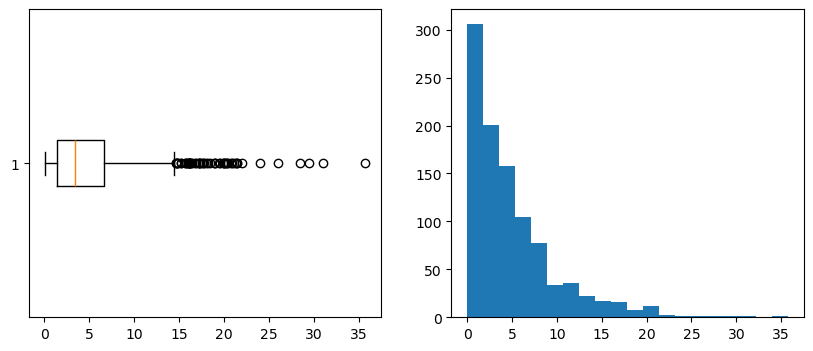

In [76]:
data = np.random.exponential(5,1000)
f, axarr = plt.subplots(1,2)
f.set_size_inches(10,4)
axarr[0].boxplot(data, vert=False)
axarr[1].hist(data, 20);

- Boxplots are more compact and can be used to compare many distributions. Below figure shows 10 different distributions side by side, this is not possible with a histogram.

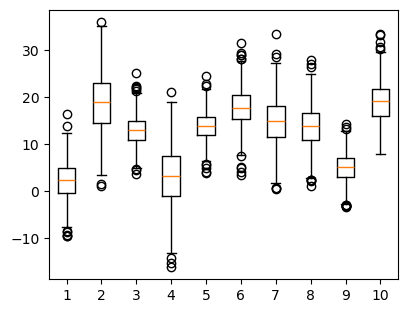

In [75]:
# generate some random data
data = []
for i in range(10):
    mean = np.random.randint(20)
    std = 3 + np.random.randint(5)
    data.append(np.random.normal(mean, std, 1000))
plt.boxplot(data);


Boxplots help us better notice the outliers. It is hard to notice the outlier in the histogram.

In [ ]:
# Generate normally distributed data
data = np.random.normal(5, 2, 1000)
data = np.append(data, 20)
f, axarr = plt.subplots(1,2)
f.set_size_inches(10,4)
axarr[0].boxplot(data, vert=False)
axarr[1].hist(data, 20);

### Not easy to interpret

Many researchers point out that box plots are not easy to interpret because they are not well aligned how the visual system works. For example, in the following box plot, does the left (Q1-Q2) or the right (Q2-Q3) region of the box contain more data?

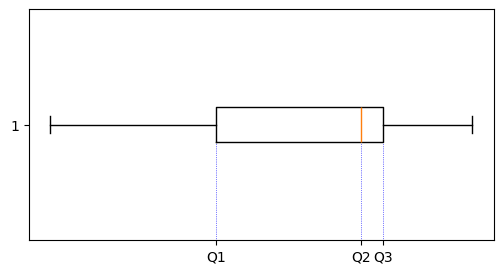

In [77]:
data = [1,2,3,4,5,6,6.3,6.4,6.5,6.6,7,8]
fig = plt.figure(1, figsize=(6, 3))
ax = fig.add_subplot(111)

quantiles = np.quantile(data, np.array([0.25, 0.50, 0.75]))
ax.vlines(quantiles, [0] * quantiles.size, [1] * quantiles.size,
          color='b', ls=':', lw=0.5, zorder=0)
ax.set_xticks(quantiles, labels=["Q1","Q2","Q3"])
ax.set_ylim(0.5, 1.5)

plt.boxplot(data, vert=False);

Various [research studies](https://psychologicabelgica.com/articles/10.5334/pb.az) show that students tend to think that the larger area contains more data points. Actually, the quartile ranges in a box plot roughly contain equal number of data points. The size of the area of a box plot represent the density of the data points not the number of data points. This seems to be counter intuitive since humans tend to associate larger/longer shapes with larger quantities however in a box plot the number of data points in quartiles are always the same (roughly) regardless of their relative sizes. Moreover, shorter segments represent higher densities and longer segments represent lower densities which is again counter intuitive.

The following interactive plot dynamically generates a box plot and a histogram as you provide data by clicking on the bottom chart.

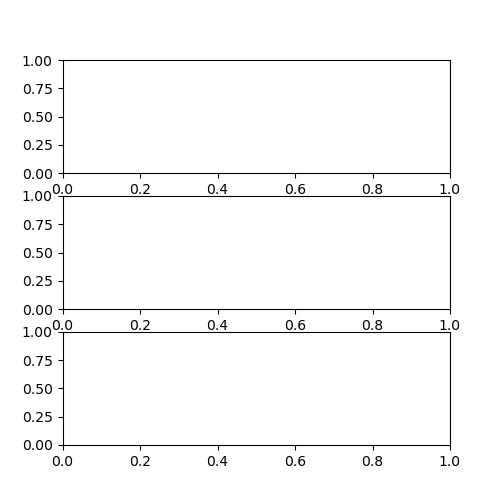

In [78]:
%matplotlib widget


# Function to collect user clicks
def collect_user_clicks(event):
    if event.button == 1:  # Left mouse button
        x_clicks.append(event.xdata)
        y_clicks.append(event.ydata)
        update_plots()

# Function to update the plots
def update_plots():
    # Clear previous plots
    ax1.clear()
    ax2.clear()
    ax3.clear()

    ax3.scatter(x_clicks, np.zeros_like(x_clicks), marker='o', color='blue', alpha=0.1)
    ax3.set_title('Data')

    ax2.boxplot(x_clicks, vert=False)
    ax2.set_title('Boxplot')

    ax1.hist(x_clicks, bins=20, color='green', alpha=0.7, edgecolor='black')
    ax1.set_title('Histogram')

    for ax in [ax1, ax2, ax3]:
        ax.set_xlabel('X Coordinates')

    plt.tight_layout()
    plt.draw()

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(5, 5))

x_clicks = []
y_clicks = []

fig.canvas.mpl_connect('button_press_event', collect_user_clicks)

plt.show()

### Kernel Density Estimation


Density estimation is a method for estimating the probability distribution that generated a dataset. A histogram can also be used for this purpose. Below on the left you see a count based histogram whereas on the right there is a probability density. Each bin displays the bin's raw count divided by the total number of counts and the bin width $density = counts / (sum(counts) * np.diff(bins)))$ <br>
so that the area under the histogram integrates to 1 <br>
$np.sum(density * np.diff(bins)) == 1$

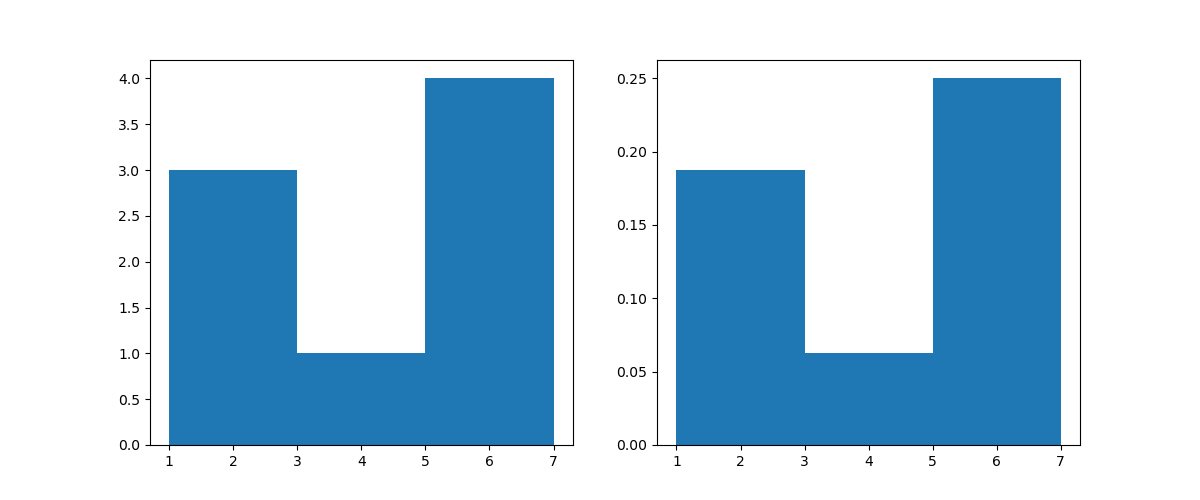

In [79]:
data = np.array([1,2,2,4,5,6,6,7])

f, axarr = plt.subplots(1,2)
f.set_size_inches(12,5)
hist1 = axarr[0].hist(data, bins=3);
hist2 = axarr[1].hist(data, bins=3, density=True);


In [80]:
counts, bins, patches = hist1
density = counts/(sum(counts)*np.diff(bins))
print(counts/(sum(counts)*np.diff(bins)))
print(np.sum(density*np.diff(bins)))

[0.1875 0.0625 0.25  ]
1.0


### Reviewing the problem of histograms

Below figures show two different histograms with the same dataset. As you can see when the cut off point of a bin slighly changes, the resulting histogram can drastically change.

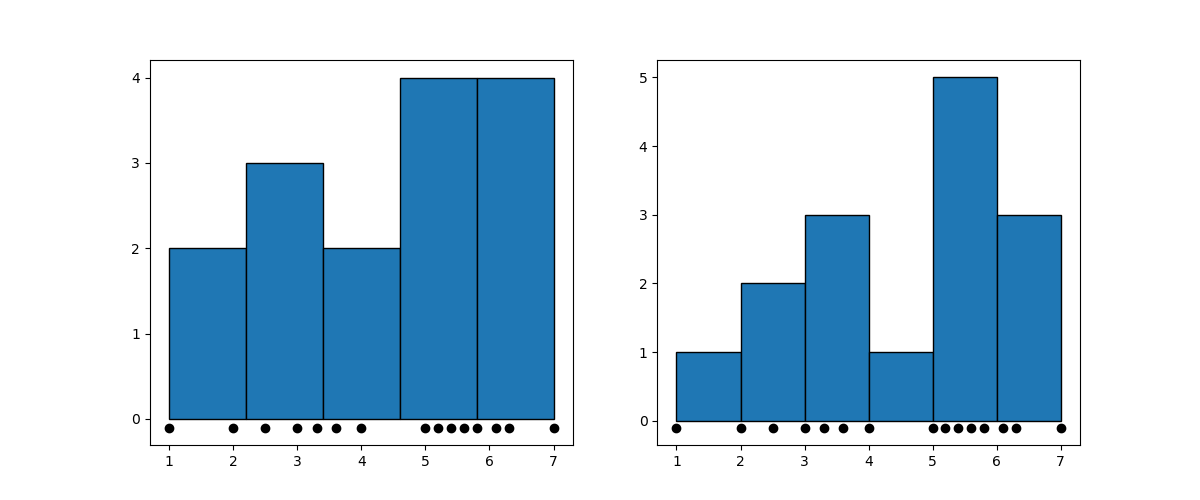

In [81]:
data = np.array([1,2,2.5,3,3.3,3.6,4,5,5.2, 5.4, 5.6, 5.8, 6.1,6.3,7])
x = np.zeros_like(data)-0.1

f, axarr = plt.subplots(1,2)
f.set_size_inches(12,5)
hist1 = axarr[0].hist(data, bins=5, edgecolor="black");
hist2 = axarr[1].hist(data, bins=6, edgecolor="black");
axarr[0].scatter(data,x, color="black")
axarr[1].scatter(data,x, color="black")

### Tophat Kernel

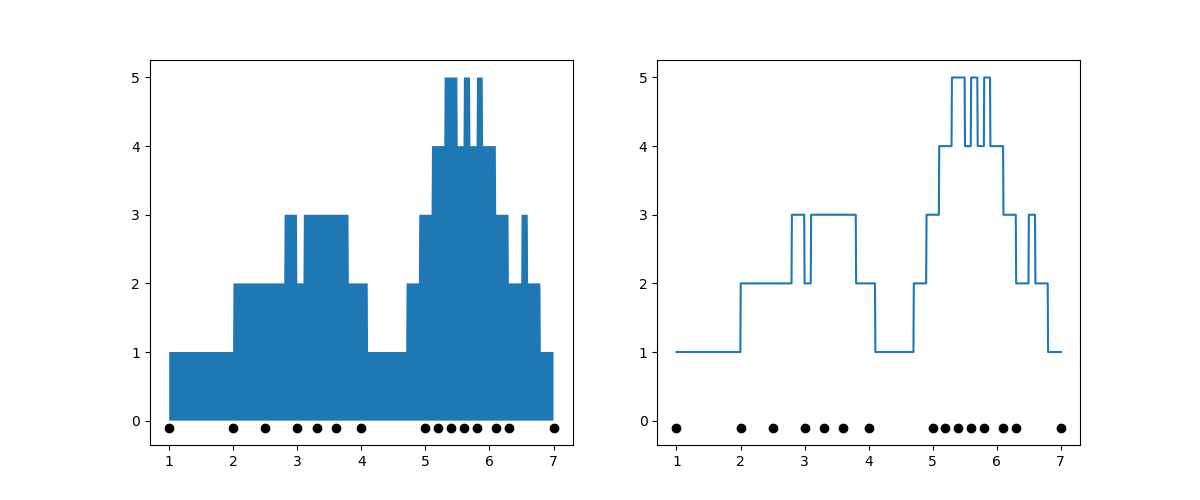

In [82]:
x_d = np.linspace(1, 7, 1000)

density = sum(abs(xi - x_d) < 0.5 for xi in data)
# If a position (x_d) is 0.5 distance within the data then 
# increase the density of that position.

f, axarr = plt.subplots(1,2)
f.set_size_inches(12,5)
axarr[0].fill_between(x_d, density)
axarr[1].plot(x_d, density)
axarr[0].scatter(data,x, color="black")
axarr[1].scatter(data,x, color="black")

### Gaussian Kernel

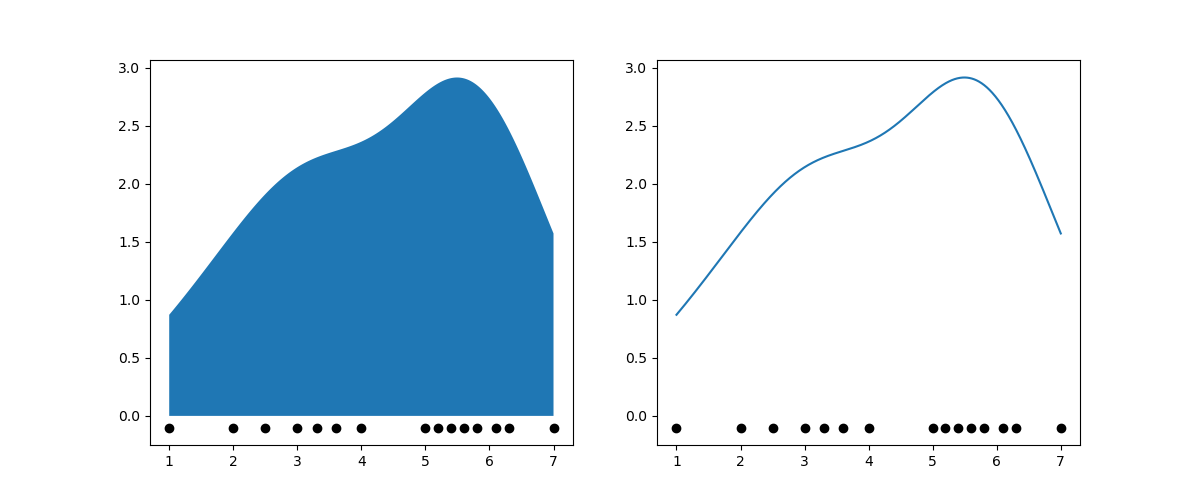

In [83]:
from scipy.stats import norm

x_d = np.linspace(1, 7, 1000)
density = sum(norm(xi).pdf(x_d) for xi in data)

f, axarr = plt.subplots(1,2)
f.set_size_inches(12,5)
axarr[0].fill_between(x_d, density)
axarr[1].plot(x_d, density)
axarr[0].scatter(data,x, color="black")
axarr[1].scatter(data,x, color="black")

### Individual Gaussian Distributions

In [ ]:
x_d = np.linspace(1, 7, 1000)
for xi in data:
    plt.plot(x_d,norm(xi).pdf(x_d)) 
plt.scatter(data,x, color="black")


In [ ]:
data = list(np.random.normal(5, 2, 1000)) + list(np.random.normal(20, 3, 2000))
np.random.shuffle(data)

from scipy.stats import norm
x = np.linspace(0, 30, 1000)
# Finds the contribution of every value in the data to every point in the given range

def K(xi,x):
    return abs(xi-x)<0.5
def Gaussian_K(xi,x):
    return norm(xi).pdf(x)
    
d_K = sum(K(xi,x) for xi in data)
d_G = sum(Gaussian_K(xi,x) for xi in data)


fig, axs = plt.subplots(2, 2)
fig.set_size_inches(10, 7)
fig.tight_layout(pad=2.0)
axs[0, 0].plot(x,d_K)
axs[0, 0].set_title('Tophat Kernel')
axs[0, 1].plot(x,d_G)
axs[0, 1].set_title('Gaussian Kernel')
axs[1, 0].hist(data, edgecolor='black', bins="auto")
axs[1, 0].set_title('bins="auto"')
axs[1, 1].hist(data, edgecolor='black', bins=100)
axs[1, 1].set_title('bins=100')

### Kernel Density Estimation with sklearn

In [ ]:
from sklearn.neighbors import KernelDensity
f, axarr = plt.subplots(1,2)
f.set_size_inches(12,5)
x_d = np.linspace(1, 7, 1000)
data = np.array(list(np.random.normal(5, 2, 1000)) + list(np.random.normal(20, 3, 2000)))
X = data.reshape(-1,1)
# tophat KDE
kde = KernelDensity(kernel="tophat", bandwidth=1).fit(X)
X_plot = x_d.reshape(-1,1)
log_dens = kde.score_samples(X_plot)
axarr[0].fill_between(x_d, np.exp(log_dens), fc="#AAAAFF")


kde = KernelDensity(kernel="gaussian", bandwidth=1).fit(X)
X_plot = x_d.reshape(-1,1)
log_dens = kde.score_samples(X_plot)
axarr[1].fill_between(x_d, np.exp(log_dens), fc="#AAAAFF")

### Violin Plots

Violin plots are kernel density estimation plots put vertically. In this way, it is possible to show many violin plots next to each other like box plots. Violin plots show the distribution of the data better than box plots. 

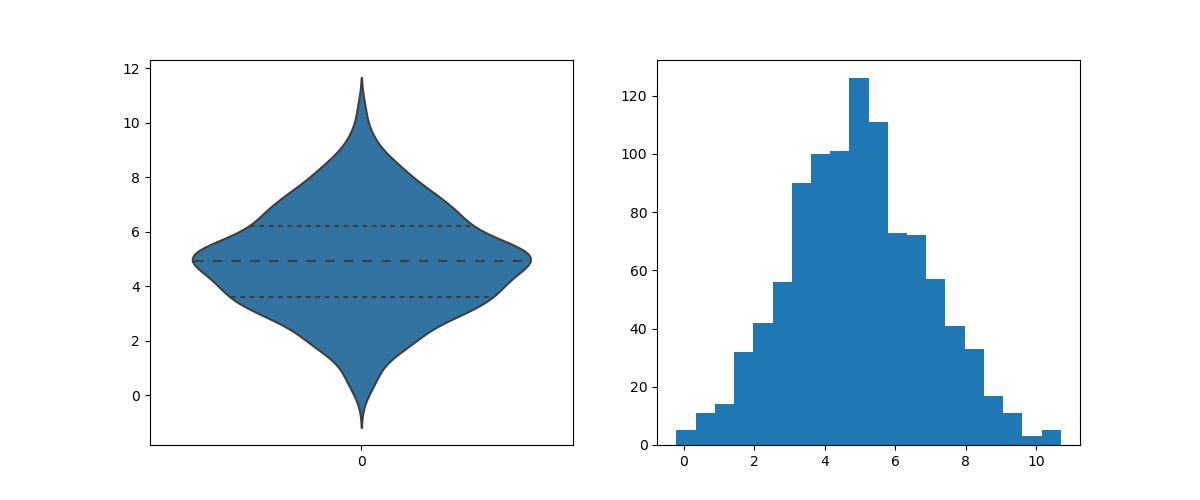

In [84]:
# Generate normally distributed data
data = np.random.normal(5, 2, 1000)
f, axarr = plt.subplots(1,2)
f.set_size_inches(12,5)
sns.violinplot(data, inner="quartile",ax=axarr[0])
axarr[1].hist(data, 20);

In [ ]:
data = np.random.exponential(5,1000)
f, axarr = plt.subplots(1,2)
f.set_size_inches(10,4)
sns.violinplot(data, inner="quartile",ax=axarr[0])
axarr[1].hist(data, 20);

In [ ]:
data = pd.DataFrame()
for i in range(10):
    mean = np.random.randint(20)
    std = 3 + np.random.randint(5)
    data[str(i)]=np.random.normal(mean, std, 1000)
sns.violinplot(data, orient="h",inner=None);

### ECDF Plots

Empirical cumulative distribution function (ECDF) plots show the count or proportion of observations falling below each unique value in a dataset. This can be achieved by ordering the data from smallest to the largest. Compared to histograms and boxplots, ECDF plots show all the data and there are no binning or smoothing parameters. The disadvantage is they do not give information about the basic properites of the distribution such as variance, mean, bimodality, etc.

In [ ]:
data = list(np.random.normal(5, 2, 1000)) + list(np.random.normal(20, 3, 2000))
f, axarr = plt.subplots(1,2)
f.set_size_inches(10,4)
sns.ecdfplot(data, ax=axarr[0], stat='count')
sns.ecdfplot(data, ax=axarr[1], stat='proportion')

With ECDF plots you can easlily answer questions such as: how many data values are below/above $x$ or what percentage of the data is below/above $x$? For example, for the graph above, you can easily see that there are roughly 1000 data points below 10, or roughly 35% of the data points are below 4.

Since they don't occupy a large space, similar to box plots, multiple ECDF plots can be shown on a single figure.

In [ ]:
# generate some random data
data = []
for i in range(10):
    mean = np.random.randint(20)
    std = 3 + np.random.randint(5)
    data.append(np.random.normal(mean, std, 1000))
sns.ecdfplot(data);

### Univariate Plots for Categorical Data

### Bar Chart

<Figure size 350x250 with 0 Axes>

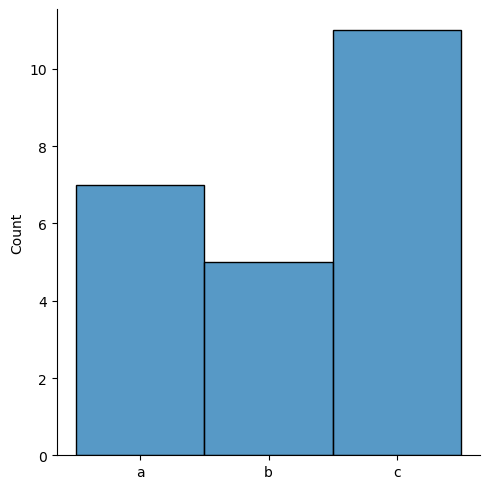

In [29]:
fig = plt.figure(figsize=(3.5, 2.5))
data = ['a','a','a','a','a','a','a','b','b','b','b','b','c','c','c','c','c','c','c','c','c','c','c']
sns.displot(data);



### Multivariate Plots for Numerical vs. Numerical Data


#### Scatter Plot

We can use scatter plots to look at the relationship between two numeric columns.

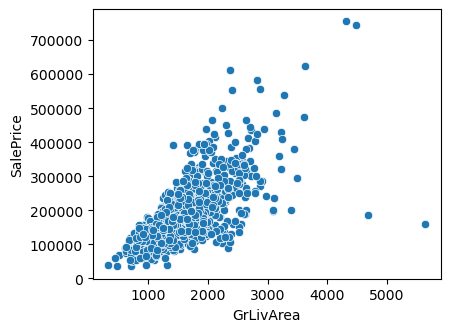

In [30]:
# make a scatter plot showing GrLivarea vs. SalePrice
sns.scatterplot(x=house.GrLivArea, y=house.SalePrice);


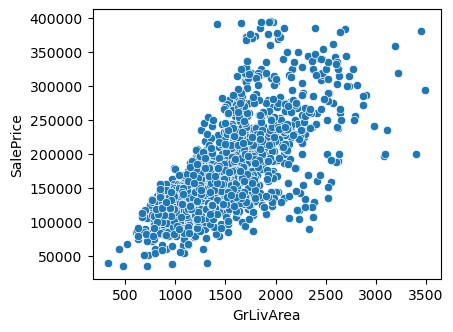

In [31]:
# Drop the outliers and plot again
house2 = house[(house.GrLivArea < 4000) & (house.SalePrice < 400000)]
sns.scatterplot(x=house2.GrLivArea, y=house2.SalePrice);

Adding a 3rd dimension

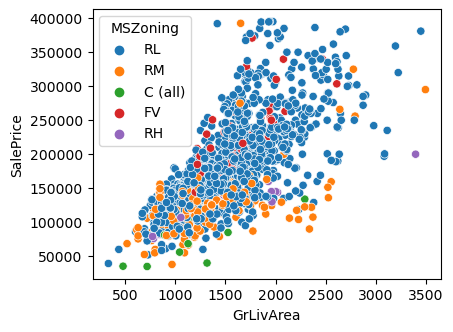

In [32]:
sns.scatterplot(x=house2.GrLivArea, y=house2.SalePrice, hue=house2.MSZoning);

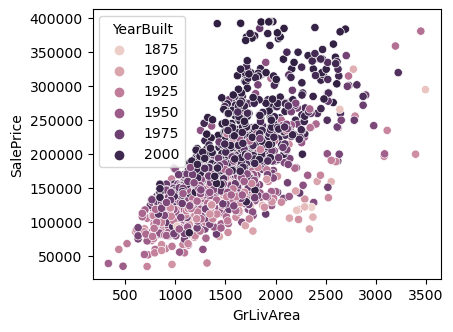

In [33]:
sns.scatterplot(x=house2.GrLivArea, y=house2.SalePrice, hue=house2.YearBuilt);

#### 2D histograms

A 2D histogram bins the data within rectangles and then shows the count of observations within each rectangle with the fill color. In a scatter plot it is not possible to see the density of the regions when we have too many data. 

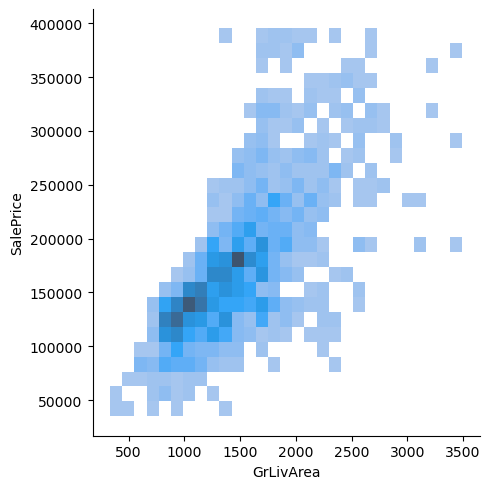

In [34]:
sns.displot(house2, x=house2.GrLivArea, y=house2.SalePrice);

### Multivariate Plots for  Categorical vs. Numerical Data
#### Scatter Plots

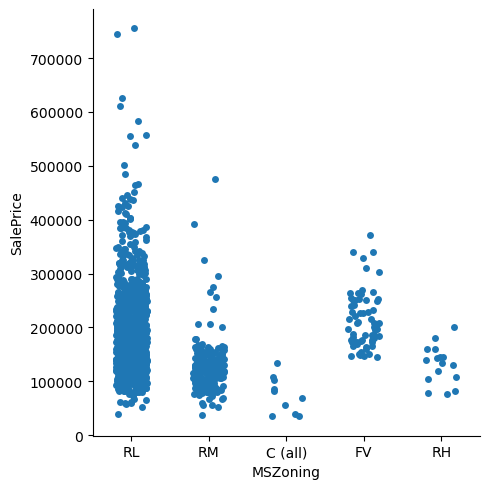

In [35]:
sns.catplot(x='MSZoning', y='SalePrice', data=house, jitter=0.2);
#adjusts the positions of points on the categorical axis with a small amount of random jitter

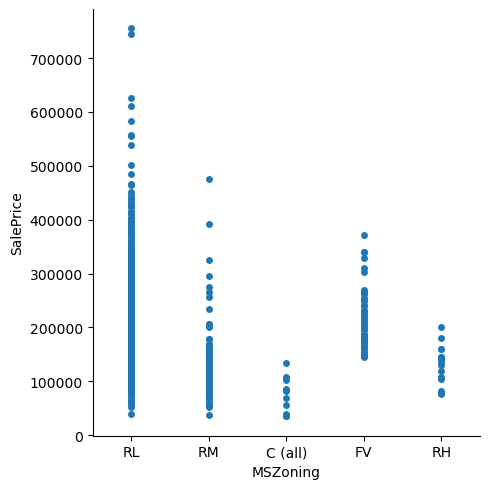

In [36]:
sns.catplot(x='MSZoning', y='SalePrice', data=house, jitter=False);

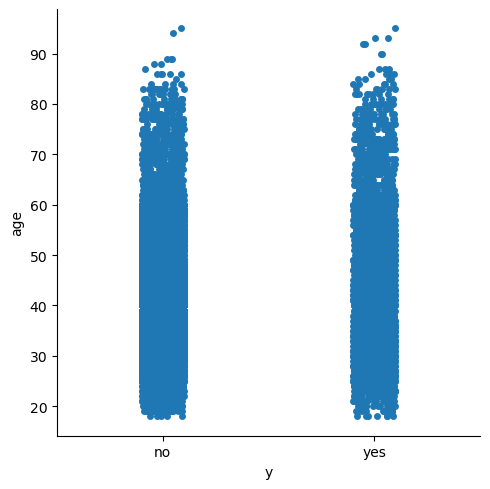

In [37]:
sns.catplot(x='y', y='age', data=bank);

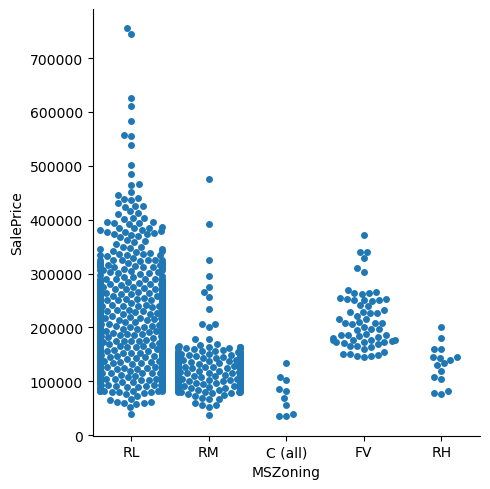

In [38]:
sns.catplot(x='MSZoning', y='SalePrice', data=house, kind="swarm");

#### Box plots

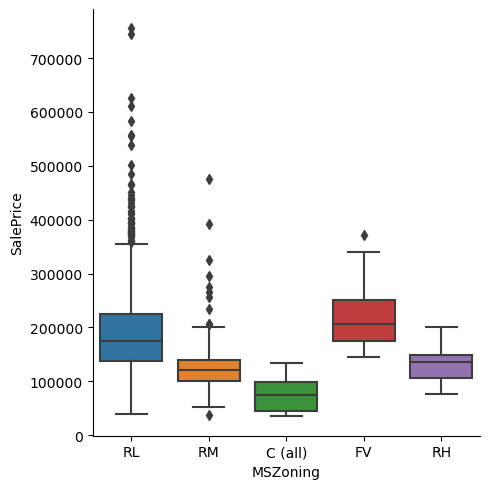

In [39]:
sns.catplot(x='MSZoning', y='SalePrice', kind="box", data=house);

### Zoning Districts 
- RL – Residential Low Density
- RM – Residential Medium Density
- C  – Commercial
- FV – Floating Village Residential
- RH – Residential High Density

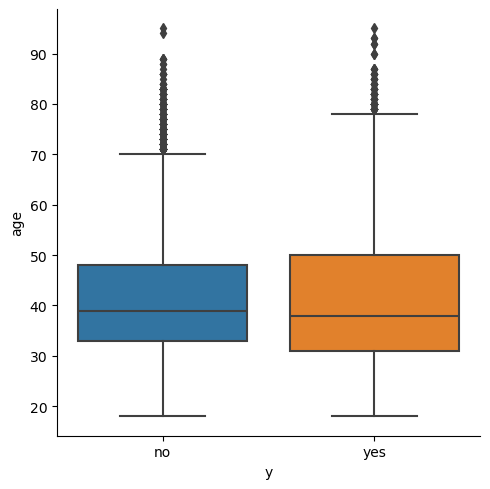

In [40]:
sns.catplot(x='y', y='age', kind="box", data=bank);

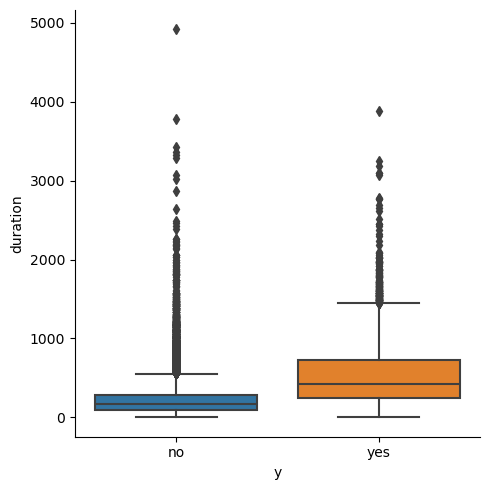

In [41]:
sns.catplot(x='y', y='duration', kind="box", data=bank);

### Categorical vs. Categorical

### Stacked Histogram

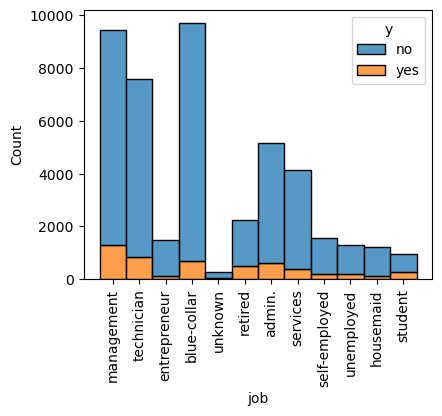

In [42]:
sns.histplot(data=bank, x="job", hue="y", multiple="stack");
plt.xticks(rotation=90);

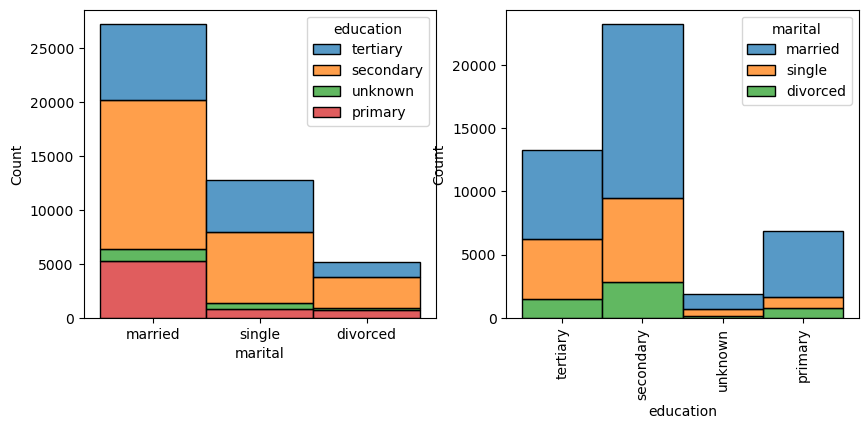

In [43]:
f, axarr = plt.subplots(1,2)
f.set_size_inches(10,4)
sns.histplot(data=bank, x="marital", hue="education", multiple="stack", ax=axarr[0]);
sns.histplot(data=bank, x="education", hue="marital", multiple="stack", ax=axarr[1]);
plt.xticks(rotation=90);
